# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [52]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

try:
    data = pd.read_csv(r"C:\Users\yka\Documents\Practicum\DS_Practicum\Real_Estate_Price_Prediction\source\real_estate_data.csv", sep='\t', header=0)
except:
    data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t', header=0)

data.head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Так как данные занимают отностиельно мало места в памяти, нет смысла в оптимизации типов данных.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

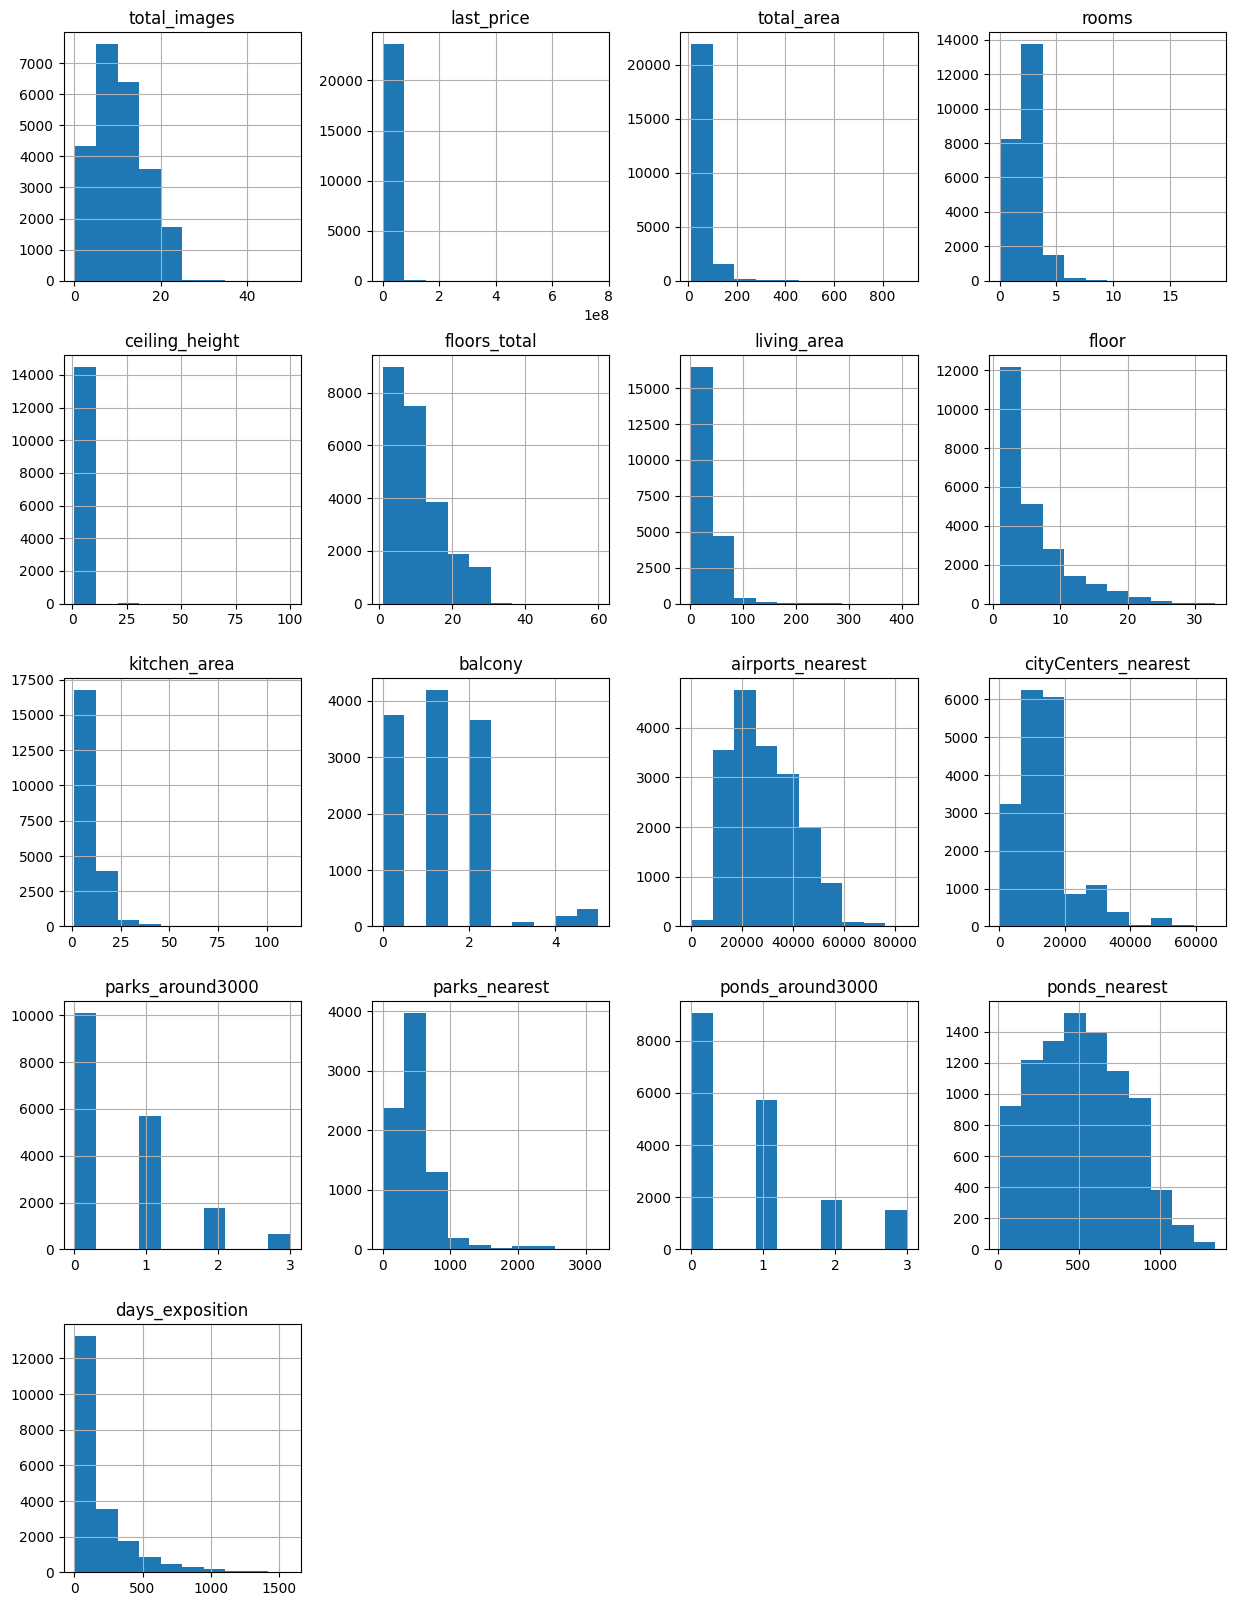

In [54]:
data.hist(figsize=(15, 20))

### Выполните предобработку данных

In [55]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для понимания того, какие пропуски сильно влияют на цену рассмотрим корреляции.

In [56]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


<AxesSubplot:>

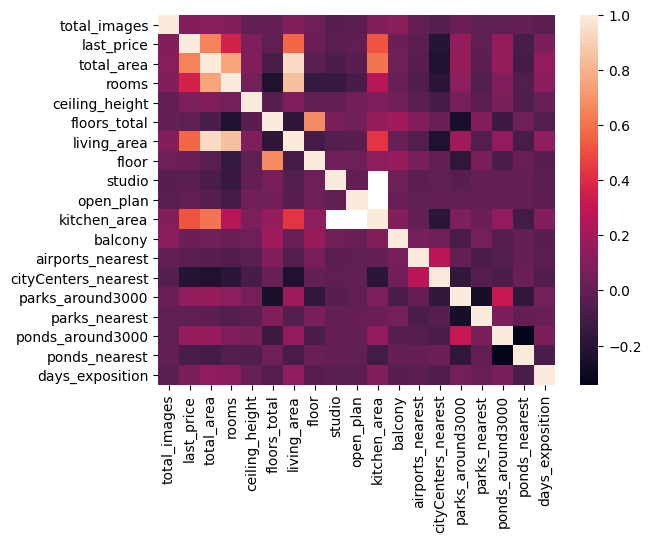

In [57]:
sb.heatmap(data.corr())

Примим решение по обработке пропусков для кажлого из соответствующих столбцов. Начнём с атрибутов данных, которые незначительно влияют на цену.

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.100e+01, 0.000e+00, 6.000e+00, 4.100e+01, 5.089e+03,
        4.166e+03, 2.281e+03, 2.660e+02, 1.460e+03, 4.200e+02, 2.100e+02,
        2.550e+02, 8.200e+01, 4.700e+01, 4.400e+01, 4.900e+01, 7.000e+00,
        1.200e+01, 6.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([1.        , 1.13333333, 1.26666667, 1.4       , 1.53333333,
        1.66666667, 1.8       , 1.93333333, 2.06666667, 2.2       ,
        2.33333333, 2.46666667, 2.6       , 2.73333333, 2.86666667,
        3.        , 3.13333333, 3.26666667, 3.4       , 3.53333333,
        3.66666667, 3.8       , 3.93333333, 4.06666667, 4.2       ,
        4.33333333, 4.46666667, 4.6       , 4.73333333, 4.86666667,
        5.        ]),
 <BarContainer object of 30 artists>)

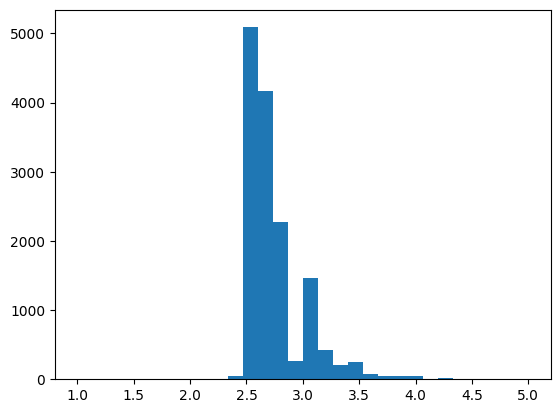

In [58]:
plt.hist(data["ceiling_height"], bins=30, range=(1, 5))

In [59]:
data["ceiling_height"].corr(data["last_price"])

0.085430309828426

Учитывая график распределения высоты потолков с длинным хвостом в сторону высоких потолков и относительно низкую корреляцию с ценой, заменим пропуски медианным значением как наиболее типичным без риска исказить целевой показатель предсказания.

In [60]:
data["ceiling_height"] = data["ceiling_height"].fillna(value=data["ceiling_height"].median())
data["ceiling_height"].isna().sum()

0

(array([2.500e+01, 3.830e+02, 6.680e+02, 6.988e+03, 9.140e+02, 5.920e+02,
        4.151e+03, 1.174e+03, 2.030e+02, 1.591e+03, 5.530e+02, 3.650e+02,
        2.209e+03, 5.050e+02, 3.390e+02, 4.290e+02, 2.860e+02, 3.520e+02,
        1.544e+03, 1.240e+02, 1.640e+02, 2.200e+01, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 2.400e+01, 4.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <BarContainer object of 30 artists>)

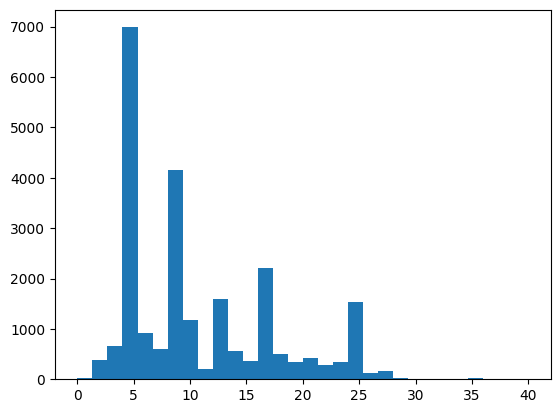

In [61]:
plt.hist(data["floors_total"], bins=30, range=(0, 40))

In [62]:
data["floors_total"].corr(data["last_price"])

-0.006983534007227376

Учитывая график распределения этажности здания с хвостами, несколькими локальными максимумами и относительно низкую корреляцию с ценой, заменим пропуски средним арифметическим значением чтобы не искажать дисперсию.

In [63]:
data["floors_total"] = data["floors_total"].fillna(value=data["floors_total"].mean())
data["floors_total"].isna().sum()

0

Рассмотрим пропуски в поле `is_apartment`. Их подозрительно много. Пропуски почти во всех записях.

In [64]:
data["is_apartment"].isna().sum()

20924

In [65]:
data["is_apartment"].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Т.к. апартаментов в присутствующих данных очень мало предположим, что во всех записях пропуски обозначают, что недвижимость не является апартаментами.

In [66]:
data["is_apartment"] = data["is_apartment"].fillna(value=False)
data["is_apartment"].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Рассмотрим пропуски в поле `is_apartment`. Пропуски почти в половине записей.

In [71]:
data["balcony"].isna().sum()

11519

In [72]:
data["balcony"].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Предположим, что в записях с пропусками нет балконов т.к. продавец замотивирован указывать преимущества в своём объявлений и пропуск может означать отсутствие.

In [73]:
data["balcony"] = data["balcony"].fillna(value=0)
data["balcony"].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Рассмотрим пропуски в поле `locality_name`. Т.к. из названия поля не ясно, что значит эта строка, посмотрим на значения и их количество

In [77]:
data["locality_name"].isna().sum()

49

In [78]:
data["locality_name"].value_counts()

Санкт-Петербург                 15721
посёлок Мурино                    522
посёлок Шушары                    440
Всеволожск                        398
Пушкин                            369
                                ...  
коттеджный посёлок Лесное           1
посёлок Сумино                      1
посёлок Форт Красная Горка          1
деревня Снегирёвка                  1
городской посёлок Свирьстрой        1
Name: locality_name, Length: 364, dtype: int64

Поле означает название населённого пункта. Предположим, что в значениях этого поля могут быть явные и неявные дубликаты и проверим это позже. На данном этапе заполним пропуски строками "No locality" т.к. значение может быть в дальнейшем использовано для группировки по категории населённых пунктов.

In [79]:
data["locality_name"] = data["locality_name"].fillna(value="No locality")
data["locality_name"].isna().sum()

0

Поле `airports_nearest` не очень скоррелировано с прогнозируемым показателем, поэтому посмотрим на частотность встречаемых значений и примем решение исходя их неё.

In [95]:
data["parks_nearest"].isna().sum()

15620

(array([1.000e+00, 2.000e+00, 3.070e+02, 1.444e+03, 1.825e+03, 1.794e+03,
        1.724e+03, 1.959e+03, 1.304e+03, 1.392e+03, 1.583e+03, 1.247e+03,
        8.570e+02, 8.420e+02, 6.580e+02, 6.950e+02, 2.670e+02, 8.200e+01,
        4.900e+01, 2.900e+01, 6.700e+01, 1.700e+01, 4.000e+00, 1.000e+00,
        2.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([     0.        ,   3333.33333333,   6666.66666667,  10000.        ,
         13333.33333333,  16666.66666667,  20000.        ,  23333.33333333,
         26666.66666667,  30000.        ,  33333.33333333,  36666.66666667,
         40000.        ,  43333.33333333,  46666.66666667,  50000.        ,
         53333.33333333,  56666.66666667,  60000.        ,  63333.33333333,
         66666.66666667,  70000.        ,  73333.33333333,  76666.66666667,
         80000.        ,  83333.33333333,  86666.66666667,  90000.        ,
         93333.33333333,  96666.66666667, 100000.        ]),
 <BarContainer object of 30 artists

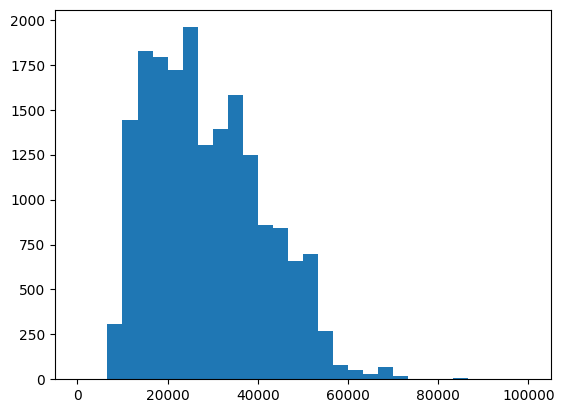

In [86]:
plt.hist(data["airports_nearest"], bins=30, range=(0, 100000))

В распределении расстояний до ближайшего аэропорта видно небольшой хвост и выброс, поэтому оптимально будет использовать медиану для заполнения пропусков в этом поле с учётом того, что это значение мало влияет на цену.

In [87]:
data["airports_nearest"] = data["airports_nearest"].fillna(value=data["airports_nearest"].median())
data["airports_nearest"].isna().sum()

0

В поле `parks_nearest` больше половины записей содержат пропуски. Рассмотрим, какие значения встречаются в этом атрибуте данных.

(array([291., 330., 596., 610., 697., 823., 869., 950., 746., 693., 515.,
        230., 193.,  81.,  78.,  47.,  30.,  25.,  35.,  30.,   9.,  12.,
         32.,   6.,   3.,   4.,  13.,   4.,   5.,   5.]),
 array([   0.        ,   66.66666667,  133.33333333,  200.        ,
         266.66666667,  333.33333333,  400.        ,  466.66666667,
         533.33333333,  600.        ,  666.66666667,  733.33333333,
         800.        ,  866.66666667,  933.33333333, 1000.        ,
        1066.66666667, 1133.33333333, 1200.        , 1266.66666667,
        1333.33333333, 1400.        , 1466.66666667, 1533.33333333,
        1600.        , 1666.66666667, 1733.33333333, 1800.        ,
        1866.66666667, 1933.33333333, 2000.        ]),
 <BarContainer object of 30 artists>)

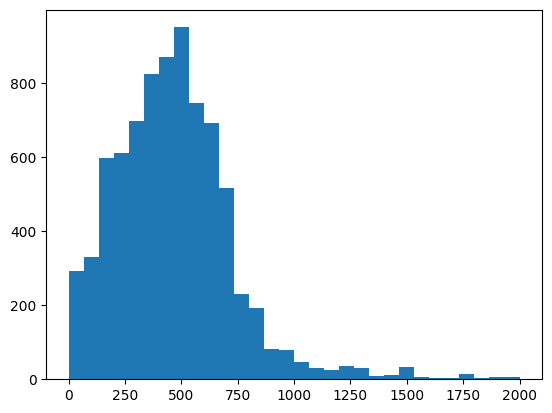

In [93]:
plt.hist(data["parks_nearest"], bins=30, range=(0, 2000))

Распределение похоже на нормальное, но есть большой хвост. Поэтому оптимально заменить пропуски на медианные значения с учётом малой зависимости цены от этого атрибута данных.

In [96]:
data["parks_nearest"] = data["parks_nearest"].fillna(value=data["parks_nearest"].median())
data["parks_nearest"].isna().sum()

0

(array([   8.,  252., 5972., 1852., 4973., 2282., 2540., 1505.,  724.,
         473.,  308.,  189.,  166.,  106.,   83.,   75.,   43.,   26.,
          33.,   20.,   12.,   24.,   19.,   13.,   21.,    9.,    9.,
          13.,    8.,    7.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <BarContainer object of 30 artists>)

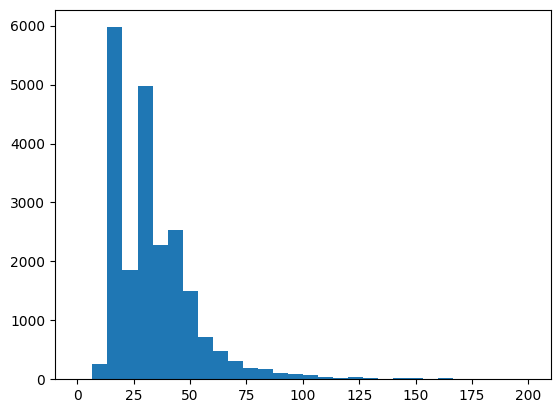

In [67]:
plt.hist(data["living_area"], bins=30, range=(0, 200))

In [68]:
data["living_area"].corr(data["last_price"])

0.5664915336952648

Учитывая график распределения жилой площади с длинным хвостом и относительно высокую корреляцию с ценой, заменим пропуски сомоделировав исходное распределение методом Multiple Imputation.

In [69]:
selected_dtype = data.select_dtypes(include=['float64', 'int64'])
selected_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_images         23699 non-null  int64  
 1   last_price           23699 non-null  float64
 2   total_area           23699 non-null  float64
 3   rooms                23699 non-null  int64  
 4   ceiling_height       23699 non-null  float64
 5   floors_total         23699 non-null  float64
 6   living_area          21796 non-null  float64
 7   floor                23699 non-null  int64  
 8   kitchen_area         21421 non-null  float64
 9   balcony              12180 non-null  float64
 10  airports_nearest     18157 non-null  float64
 11  cityCenters_nearest  18180 non-null  float64
 12  parks_around3000     18181 non-null  float64
 13  parks_nearest        8079 non-null   float64
 14  ponds_around3000     18181 non-null  float64
 15  ponds_nearest        9110 non-null  

Рассчитаем пропущенные значения пользуясь доступной информацией из датасета методом Multiple Imputation с целью сохранить связи в данных и минимально исказаить распределение характеристик с большим влиянием на цену.

In [70]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

selected_dtype = data.select_dtypes(include=['float64', 'int64'])
regressor = LinearRegression()
imp = IterativeImputer(estimator=regressor, missing_values=np.nan, max_iter=5, verbose=2, imputation_order='roman')
Imputed_data = pd.DataFrame(imp.fit_transform(selected_dtype), columns=selected_dtype.columns)
Imputed_data.isna().sum()

[IterativeImputer] Completing matrix with shape (23699, 17)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.20
[IterativeImputer] Change: 15610.151954016872, scaled tolerance: 763000.0 
[IterativeImputer] Early stopping criterion reached.


total_images           0
last_price             0
total_area             0
rooms                  0
ceiling_height         0
floors_total           0
living_area            0
floor                  0
kitchen_area           0
balcony                0
airports_nearest       0
cityCenters_nearest    0
parks_around3000       0
parks_nearest          0
ponds_around3000       0
ponds_nearest          0
days_exposition        0
dtype: int64

### Добавьте в таблицу новые столбцы

### Проведите исследовательский анализ данных

### Напишите общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [ ]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [ ]  Найдены пропущенные значения.
- [ ]  Пропущенные значения заполнены там, где это возможно.
- [ ]  Объяснено, какие пропущенные значения обнаружены.
- [ ]  В каждом столбце установлен корректный тип данных.
- [ ]  Объяснено, в каких столбцах изменён тип данных и почему.
- [ ]  Устранены неявные дубликаты в названиях населённых пунктов.
- [ ]  Обработаны редкие и выбивающиеся значения (аномалии).
- [ ]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [ ]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [ ]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [ ]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [ ]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [ ]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [ ]  На каждом этапе сделаны промежуточные выводы.
- [ ]  В конце проекта сделан общий вывод.